In [1]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data

# Functions to read and show images.
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.linalg import eigh 
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('train.csv')


# save the labels into a variable l.
labels = data['label']

# Drop the label feature and store the pixel data in d.
data2 = data.drop("label",axis=1)



In [3]:
print(data2.shape)
print(labels.shape)

(42000, 784)
(42000,)


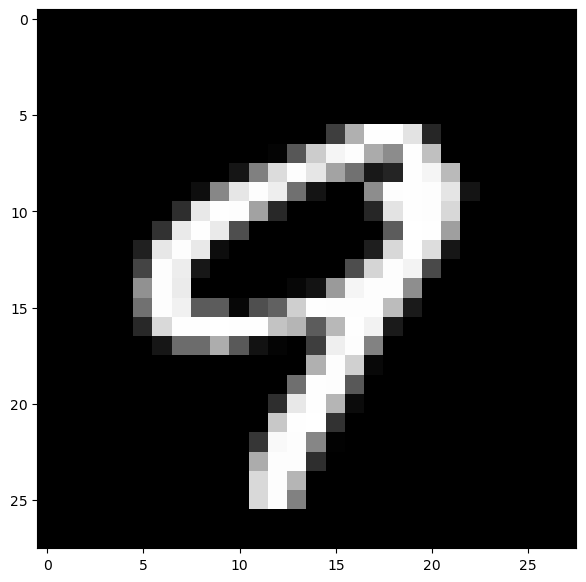

9


In [4]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 100

grid_data = data2.iloc[idx].values.reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(labels[idx])

In [5]:
# Pick first 15K data-points to work on for time-effeciency.
#Excercise: Perform the same analysis on all of 42K data-points.

labels_15000 = labels.head(15000)
data2_15000 = data2.head(15000)

print("the shape of sample data = ", data2_15000.shape)
print("the shape of labels = ", labels_15000.shape)


the shape of sample data =  (15000, 784)
the shape of labels =  (15000,)


In [6]:
# Doing Data-preprocessing: Standardizing the data

standardized_data = StandardScaler().fit_transform(data2_15000)
print(standardized_data.shape)

(15000, 784)


In [7]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [9]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.
#https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.eigh.html

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783)(index) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [10]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultant new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultant new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [11]:

# appending label to the 2d projected data(vertical stack)
new_coordinates = np.vstack((new_coordinates, labels_15000)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())
#(0,1,2,3,4 are Xi other are principal axis)

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


c:\Users\afrincon\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


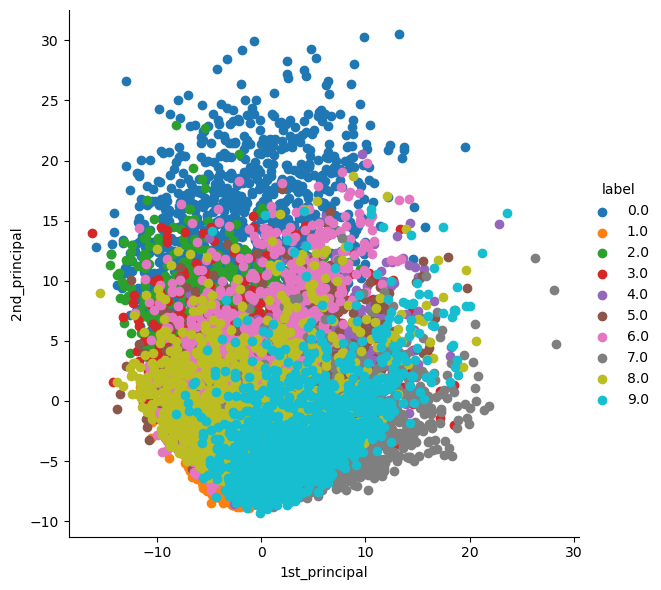

In [12]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## PCA using Scikit-Learn

In [ ]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [ ]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

In [ ]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels_15000)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## PCA for dimensionality reduction 

In [ ]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [ ]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.